## 机器学习与建模
### 数据模型来源于数据，数据决定了建模的上限，而模型只是在逼近这个上限
数据模型 = 数据 + 模型， 是两者共同作用的结果，数据的质和量越大，则模型的复杂度越低，否者模型的复杂度就越高
### 特征工程
<img src="./01.png" width=600/>

## 数据清洗
数据样本抽样
- 样本要具有代表性
- 样本比例要考虑平衡
- 尽量考虑全量数据




In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,Normalizer

In [6]:
df = pd.read_csv('~/mycode/python/data_analyze/data/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### 异常值（空值）处理
- 识别异常值  
pandas: isnull()/duplicated()
- 直接丢弃  
pandas: drop()/dropna()/drop_duplicated()
- 用新值\集中值\边界值代替异常值  
pandas: fillna()


In [7]:
df = pd.DataFrame({"A":["a0","a1","a1","a2","a3","a4"],"B":["b0","b1","b2","b2","b3",None],"C":[1,2,None,3,4,5],"D":[1000,4,2,6,9,5],"E":[10,22,44,332,55,None],"F":["f0","f1","g2","f3","f4","f5"]})
df

,A,B,C,D,E,F
0,a0,b0,1.0,1000,10.0,f0
1,a1,b1,2.0,4,22.0,f1
2,a1,b2,NaN,2,44.0,g2
3,a2,b2,3.0,6,332.0,f3
4,a3,b3,4.0,9,55.0,f4
5,a4,None,5.0,5,NaN,f5


In [8]:
df.isnull()

,A,B,C,D,E,F
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,True,False,False,True,False


In [9]:
df.dropna()

,A,B,C,D,E,F
0,a0,b0,1.0,1000,10.0,f0
1,a1,b1,2.0,4,22.0,f1
3,a2,b2,3.0,6,332.0,f3
4,a3,b3,4.0,9,55.0,f4


In [10]:
df.dropna(axis=1)

,A,D,F
0,a0,1000,f0
1,a1,4,f1
2,a1,2,g2
3,a2,6,f3
4,a3,9,f4
5,a4,5,f5


In [11]:
df.dropna(subset=["B"])

,A,B,C,D,E,F
0,a0,b0,1.0,1000,10.0,f0
1,a1,b1,2.0,4,22.0,f1
2,a1,b2,NaN,2,44.0,g2
3,a2,b2,3.0,6,332.0,f3
4,a3,b3,4.0,9,55.0,f4


In [12]:
df.duplicated(["A"])

0    False
1    False
2     True
3    False
4    False
5    False
dtype: bool

In [13]:
df.duplicated(["A","B"])

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [14]:
df.drop_duplicates(["A"])

,A,B,C,D,E,F
0,a0,b0,1.0,1000,10.0,f0
1,a1,b1,2.0,4,22.0,f1
3,a2,b2,3.0,6,332.0,f3
4,a3,b3,4.0,9,55.0,f4
5,a4,None,5.0,5,NaN,f5


In [15]:
#see api,keep取值：first,last,False
df.drop_duplicates(["A"],keep=False) 

,A,B,C,D,E,F
0,a0,b0,1.0,1000,10.0,f0
3,a2,b2,3.0,6,332.0,f3
4,a3,b3,4.0,9,55.0,f4
5,a4,None,5.0,5,NaN,f5


In [16]:
df.fillna("空值")

,A,B,C,D,E,F
0,a0,b0,1,1000,10,f0
1,a1,b1,2,4,22,f1
2,a1,b2,空值,2,44,g2
3,a2,b2,3,6,332,f3
4,a3,b3,4,9,55,f4
5,a4,空值,5,5,空值,f5


In [17]:
df.fillna({"E":df["E"].mean()})

,A,B,C,D,E,F
0,a0,b0,1.0,1000,10.0,f0
1,a1,b1,2.0,4,22.0,f1
2,a1,b2,NaN,2,44.0,g2
3,a2,b2,3.0,6,332.0,f3
4,a3,b3,4.0,9,55.0,f4
5,a4,None,5.0,5,92.6,f5


In [18]:
higher = df["D"].quantile(0.75)
lower = df["D"].quantile(0.25)
k = 1.5
quan_range = higher - lower

df[df["D"] > lower - k * quan_range][df["D"] < higher + k * quan_range]

,A,B,C,D,E,F
1,a1,b1,2.0,4,22.0,f1
2,a1,b2,NaN,2,44.0,g2
3,a2,b2,3.0,6,332.0,f3
4,a3,b3,4.0,9,55.0,f4
5,a4,None,5.0,5,NaN,f5


In [19]:
#列表生成式
df[[True if item.startswith("f") else False for item in list(df["F"].values)]]

,A,B,C,D,E,F
0,a0,b0,1.0,1000,10.0,f0
1,a1,b1,2.0,4,22.0,f1
3,a2,b2,3.0,6,332.0,f3
4,a3,b3,4.0,9,55.0,f4
5,a4,None,5.0,5,NaN,f5


### 特征选择
数据类型 | 可用方法 |  
-|-|
连续-连续 | 相关系数、假设检验 |
连续-离散（二值） | 相关系数、最大熵增益切分 |
连续-离散（非二值） | 相关系数（定序） |
离散（二值）-离散（二值） | 相关系数、熵相关、F分值 |
离散-离散（非二值） | 熵相关、相关系数（定序） |

In [20]:
import scipy.stats as ss
df = pd.DataFrame({"A":ss.norm.rvs(size=10),
                   "B":ss.norm.rvs(size=10),
                   "C":ss.norm.rvs(size=10),
                   "D":np.random.randint(low=0,high=2,size=10)})
df

,A,B,C,D
0,1.268743,-2.508226,-1.355084,1
1,0.158221,0.408338,0.809250,0
2,0.276824,0.091520,1.259307,1
3,-1.054493,-1.022498,2.392025,1
4,-0.443154,-0.826127,-0.531804,0
5,0.056636,0.406973,1.465139,0
6,0.250860,-0.297007,-0.108289,1
7,0.740792,0.473828,-1.382770,1
8,-1.052619,0.473784,-2.985364,0
9,-1.227626,0.148089,-0.622248,1


In [21]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
X = df.loc[:,["A","B","C"]]
Y = df.loc[:,"D"]
from sklearn.feature_selection import SelectKBest,RFE,SelectFromModel
#过滤思想
skb = SelectKBest(k=2)
skb.fit(X,Y)

SelectKBest(k=2, score_func=<function f_classif at 0x1a1235d730>)

In [22]:
skb.transform(X)

array([[ 1.26874275, -2.50822597],
       [ 0.15822109,  0.40833848],
       [ 0.27682395,  0.09152012],
       [-1.05449277, -1.02249764],
       [-0.44315362, -0.82612686],
       [ 0.05663648,  0.40697272],
       [ 0.25086027, -0.29700682],
       [ 0.74079165,  0.47382837],
       [-1.05261945,  0.47378428],
       [-1.22762558,  0.14808912]])

In [23]:
#包裹
rfe = RFE(estimator = SVR(kernel="linear"),n_features_to_select=2,step=1)
rfe.fit_transform(X,Y)

array([[ 1.26874275, -2.50822597],
       [ 0.15822109,  0.40833848],
       [ 0.27682395,  0.09152012],
       [-1.05449277, -1.02249764],
       [-0.44315362, -0.82612686],
       [ 0.05663648,  0.40697272],
       [ 0.25086027, -0.29700682],
       [ 0.74079165,  0.47382837],
       [-1.05261945,  0.47378428],
       [-1.22762558,  0.14808912]])

In [24]:
#过滤
sfm = SelectFromModel(estimator=DecisionTreeRegressor(),threshold=1)
sfm.fit_transform(X,Y)

array([[ 1.26874275],
       [ 0.15822109],
       [ 0.27682395],
       [-1.05449277],
       [-0.44315362],
       [ 0.05663648],
       [ 0.25086027],
       [ 0.74079165],
       [-1.05261945],
       [-1.22762558]])

### 特征变换
- 对数指数化
- 离散化
- 归一化
- 标准化

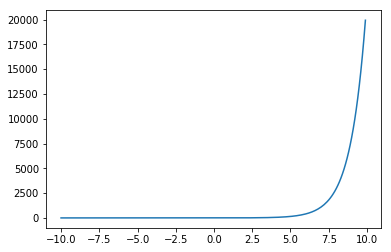

In [25]:
#指数
x = np.arange(-10,10,0.1)
y = np.exp(x)
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

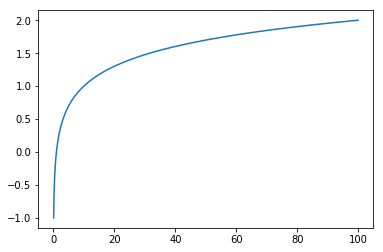

In [26]:
#对数
x = np.arange(0.1,100,0.1)
y = np.log10(x)
plt.plot(x,y)
plt.show()

### 离散化
原因：克服数据缺陷 算法要求 非线性数据映射
- 等频分箱 
- 等距分箱 
- 自因变量优化

In [38]:
x = [6,8,10,15,16,24,25,40,67]
#等频分箱
pd.qcut(x,q=3)
#pd.qcut(x,q=3,labels=["group1","group2","group3"])

[(5.999, 13.333], (5.999, 13.333], (5.999, 13.333], (13.333, 24.333], (13.333, 24.333], (13.333, 24.333], (24.333, 67.0], (24.333, 67.0], (24.333, 67.0]]
Categories (3, interval[float64]): [(5.999, 13.333] < (13.333, 24.333] < (24.333, 67.0]]

In [28]:
#等宽分箱
pd.cut(x,bins=3)
#pd.cut(x,bins=3,labels=["group1","group2","group3"])

[(5.939, 26.333], (5.939, 26.333], (5.939, 26.333], (5.939, 26.333], (5.939, 26.333], (5.939, 26.333], (5.939, 26.333], (26.333, 46.667], (46.667, 67.0]]
Categories (3, interval[float64]): [(5.939, 26.333] < (26.333, 46.667] < (46.667, 67.0]]

### 归一化
用于将值变换到0到1的区间，去除特征间的量纲影响
$$
    x = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

In [29]:
from sklearn.preprocessing import MinMaxScaler
#对列进行标准化
MinMaxScaler().fit_transform(np.array([33.2,22,5,7,8,3,2,8,98]).reshape(-1,1))


array([[ 0.325     ],
       [ 0.20833333],
       [ 0.03125   ],
       [ 0.05208333],
       [ 0.0625    ],
       [ 0.01041667],
       [ 0.        ],
       [ 0.0625    ],
       [ 1.        ]])

### 标准化
将数值变换到均值为0，标准差为1的分布
$$
    Z-score = \frac{x-\overline{x}}{\sigma}
$$

In [30]:
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(np.array([1.0,1,0,0,0,0,0,0]).reshape(-1,1))

array([[ 1.73205081],
       [ 1.73205081],
       [-0.57735027],
       [-0.57735027],
       [-0.57735027],
       [-0.57735027],
       [-0.57735027],
       [-0.57735027]])

### 数值化
- 定类数据 属性间没有大小关系 one-hot编码
- 定序数据 属性间有大小关系，但大与小不好衡量 LabelEncoder
- 定距数据 属性间有大小关系，可以衡量，但没有零点，无法乘除
- 定比数据 有大小关系，有零点，可以乘除

In [31]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder().fit(np.array(["初级工程师","中级工程师","高级工程师","资深工程师"]))
le.transform(np.array(["初级工程师","高级工程师","中级工程师","初级工程师","高级工程师","资深工程师"]))

array([1, 3, 0, 1, 3, 2])

In [32]:
lb_encoder = LabelEncoder()
lb_trans = lb_encoder.fit_transform(np.array(["Red","Yellow","Blue","Green","Yellow"]))
oh_encoder = OneHotEncoder()
one_hot = oh_encoder.fit_transform(lb_trans.reshape(-1,1))
one_hot.toarray()

array([[ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])

### 正规化
- L1正规化
- L2正规化

一般用在特征矩阵的行上面，用以体现一个对象特征之间影响的相对特点。以及模型的参数上

In [33]:
from sklearn.preprocessing import Normalizer

Normalizer(norm="l1").fit_transform(np.array([[1,1,3,-1,2]]))

array([[ 0.125,  0.125,  0.375, -0.125,  0.25 ]])

In [34]:
Normalizer().fit_transform(np.array([[1,1,3,-1,2]]))

array([[ 0.25,  0.25,  0.75, -0.25,  0.5 ]])

### 特征降维
- PCA 无监督降维方法
- Linear Discriminant Analysis 有监督降维方法  
对不同标注构成的矩阵乘以参数矩阵w，并最优化w，使得同一标注内距离尽可能小，不同标注间距离尽可能大  
思考和机器学习的关系，最优化策略

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [36]:
Y = np.array([1,1,1,2,2,2])
Y

array([1, 1, 1, 2, 2, 2])

In [37]:
LinearDiscriminantAnalysis(n_components=1).fit_transform(X,Y)

array([[-1.73205081],
       [-1.73205081],
       [-3.46410162],
       [ 1.73205081],
       [ 1.73205081],
       [ 3.46410162]])

### 特征衍生
思考xwallet